In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imagergb = cv2.imread('images/nb.jpg')
img = cv2.cvtColor(imagergb,cv2.COLOR_BGR2RGB)
print(img.shape)

(4000, 3000, 3)


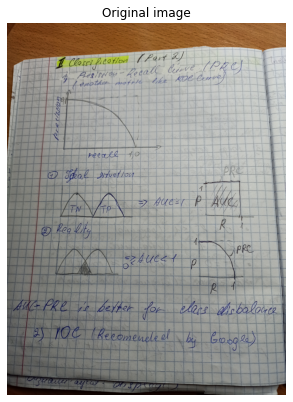

In [3]:
plt.figure(figsize=(5,10))
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(imagergb,cv2.COLOR_BGR2GRAY)


thresh = 120
im_bw = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)[1]

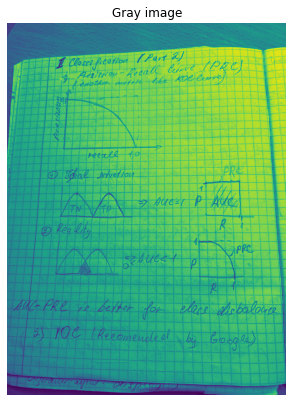

In [5]:
plt.figure(figsize=(5,10))
plt.clf()
plt.axis("off")
plt.title("Gray image")
plt.imshow(gray)

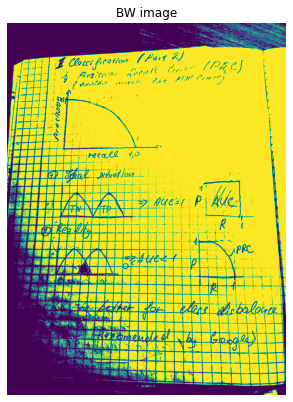

In [6]:
plt.figure(figsize=(5,10))
plt.clf()
plt.axis("off")
plt.title("BW image")
plt.imshow(im_bw)

In [7]:
edges = cv2.Canny(gray, 65, 80, apertureSize=3, L2gradient=True)

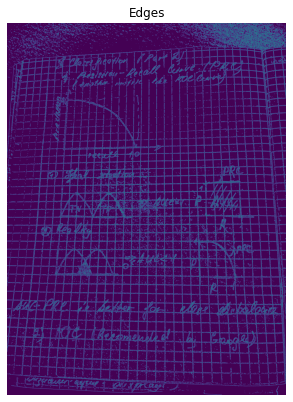

In [8]:
plt.figure(figsize=(5,10))
plt.clf()
plt.axis("off")
plt.title("Edges")
plt.imshow(edges)

In [9]:
lines = cv2.HoughLines(edges, 1, np.pi/360, 600,)

horizontal_lines = []
vertical_lines = []

for i, _ in enumerate(lines):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 4000*(-b))
        y1 = int(y0 + 4000*(a))
        x2 = int(x0 - 4000*(-b))
        y2 = int(y0 - 4000*(a))
        if abs(x1-x2) > 1000:
            cv2.line(img,(x1,y1),(x2,y2),(200,0,0),2)
            horizontal_lines.append((x1, x2, y1, y2))
        else:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
            vertical_lines.append((x1, x2, y1, y2))

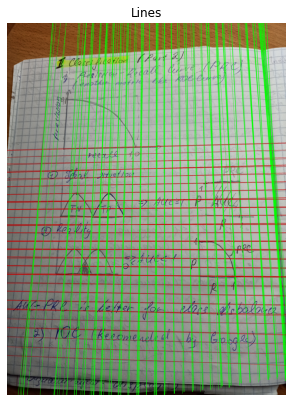

In [10]:
plt.figure(figsize=(5,10))
plt.clf()
plt.axis("off")
plt.title("Lines")
plt.imshow(img)